# Tutorial 4: Classification Analysis II

## Question 1:  K Nearest Neighbour (KNN)

In KNN, the class label of a test instance is predicted based on the majority class of its *k* closest training 
instances. The number of nearest neighbors, *k*, is a hyperparameter that must be provided by the user, along 
with the distance metric. By default, we can use Euclidean distance (which is equivalent to Minkowski distance 
with an exponent factor equals to r=2):

\begin{equation*}
\textrm{Minkowski distance}(x,y) = \bigg[\sum_{i=1}^N |x_i-y_i|^r \bigg]^{\frac{1}{r}}
\end{equation*}

__Step 1: Generate Dataset:Use the same dataset in Tutorial 3 on Model Overfitting by generating class 0 and 1__

**<font color="red">Code:</font>**

X H-axis min, max: -0.729, 19.994
X V-axis min, max: 0.003, 19.992


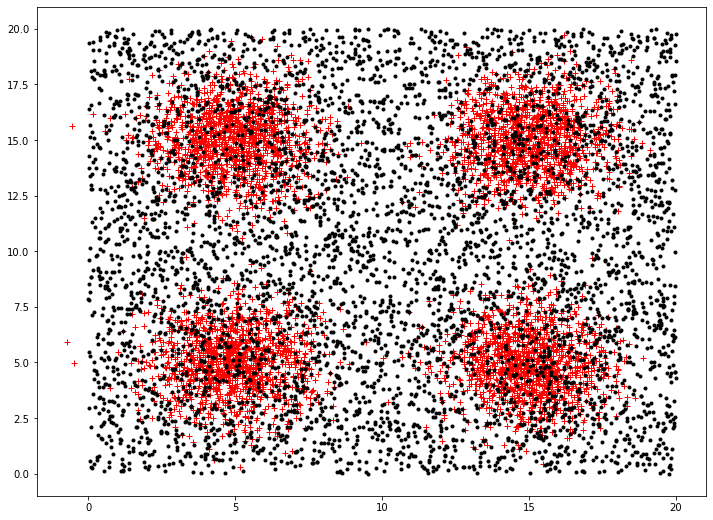

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import random

plt.rcParams["figure.figsize"] = (12,9) # The default value of the figsize parameter is [6.4, 4.8]
np.set_printoptions(precision=3, suppress= True)

N = 10000               # number of data instances

mean1 = [5, 15]
mean2 = [15, 15]
mean3 = [15, 5]
mean4 = [5, 5]

cov = [[2, 0], [0, 2]]  # diagonal covariance

np.random.seed(500)
X = np.random.multivariate_normal(mean1, cov, int(N/8))                       # 1250 rows
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/8))))  # 1250 rows
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/8))))  # 1250 rows
X = np.concatenate((X, np.random.multivariate_normal(mean4, cov, int(N/8))))  # 1250 rows
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))                        # 5000 rows
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))                    # 10000 class labels (1, 0)

print("X H-axis min, max: {0:2.3f}, {1:2.3f}".format(X[:, 0].min(), X[:, 0].max()))
print("X V-axis min, max: {0:2.3f}, {1:2.3f}".format(X[:, 1].min(), X[:, 1].max()))

_ = plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=6)

__Step 2: Split into training and Test set in ratio of 70:30__
        
1) X_train: 70% of Original Data X

2) X_test : 30% of Original Data X
    
3) Y_train: 70% of Original Class Label Data Y 
    
4) Y_test : 30% of Original Class Label Data Y

**<font color="red">Code:</font>**

In [2]:
###########################################################
# Create the Training and Test set with split 70:30 
##########################################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)
from sklearn import tree
from sklearn.metrics import accuracy_score

__Step 3: Import KNeighborsClassifier from sklearn.neighbors__
    
1) Use k range from 1,5,10,20,25,30 

2) Find out the accuracy score between
>i) Training accuracy : Y_train, Y_predTrain

>ii) Test Accuracy : Y_test, Y_predTest
    
3) Plot Training Accuracy, Test Accuracy verus K values

    # Metrics intended for real-valued vector spaces:
      identifier        class name             args              distance function
      “euclidean”       EuclideanDistance                        sqrt(sum((x - y)^2))
      “manhattan”       ManhattanDistance                        sum(|x - y|)
      “chebyshev”       ChebyshevDistance                        max(|x - y|)
      “minkowski”       MinkowskiDistance      p                 sum(|x - y|^p)^(1/p)
      “wminkowski”      WMinkowskiDistance     p, w              sum(|w * (x - y)|^p)^(1/p)
      “seuclidean”      SEuclideanDistance     V                 sqrt(sum((x - y)^2 / V))
      “mahalanobis”     MahalanobisDistance    V or VI           sqrt((x - y)' V^-1 (x - y))
    
    # Power parameter for the Minkowski metric
      When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. 
      For arbitrary p, minkowski_distance (l_p) is used

**<font color="red">Code:</font>**

Text(0, 0.5, 'Accuracy')

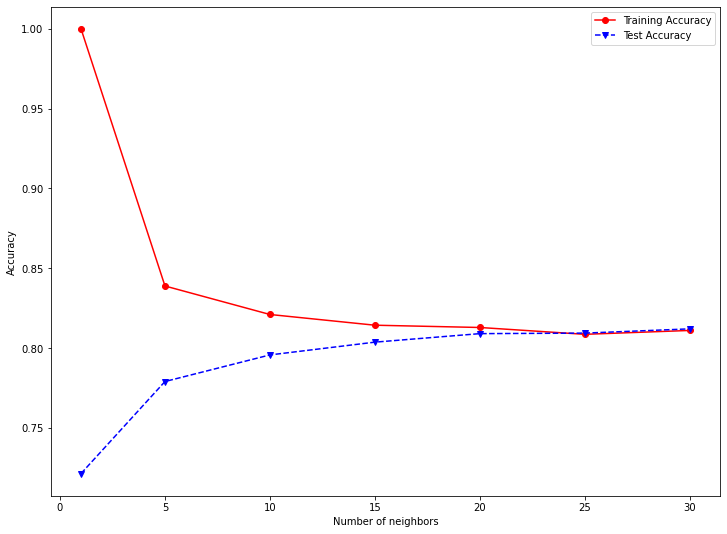

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,9) # The default value of the figsize parameter is [6.4, 4.8]

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2) 
    clf1.fit(X_train, Y_train)
    Y_predTrain = clf1.predict(X_train)
    Y_predTest = clf1.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

_ = plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

Observation: As K values increased, Test Accuracy increases while Training Accuracy drops. As more neighbours are 
added, performance will converge will it reached its plateau where more neighbours will not help in decision making


## Question 2:  Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” 
assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ 
theorem states the following relationship, given class variable y and dependent feature vectors $x_1$ through $x_n$ :

\begin{equation*}
P(y|x_1,x_2...x_n)=\frac{P(y)P(x_1,x_2...x_n|y)}{P(x_1,x_2...x_n)}
\end{equation*}

\begin{equation*}
predicted   \hat{y} = \underset{y}{\operatorname{argmax}}  P(y)\prod_{i=1}^{n}P(x_i|y)
\end{equation*}


__Step : Repeat the same process (as in Q1) using the GaussianNB() from sklearn. Determine the train and test accuracy__

**<font color="red">Code:</font>**

In [4]:
from sklearn.naive_bayes import GaussianNB

clf2=GaussianNB()
clf2.fit(X_train, Y_train)
Y_predTrain = clf2.predict(X_train)
Y_predTest = clf2.predict(X_test)
trainAcc=accuracy_score(Y_train, Y_predTrain)
testAcc=accuracy_score(Y_test, Y_predTest)

np.set_printoptions(precision=3)
print("\nTraining Accuracy: {0:2.3f}".format(trainAcc))
print("\nTesting Accuracy : {0:2.3f}".format(testAcc))


Training Accuracy: 0.586

Testing Accuracy : 0.574


Observation: The class prediction is only about half success. Why???

## Question 3:  Linear Prediction using Logistics Regression and linear Support Vector Machine

Linear classifiers such as logistic regression and support vector machine (SVM) constructs a linear separating 
hyperplane to distinguish instances from different classes. 

For logistic regression, the model can be described by the following equation:
\begin{equation*}
P(y=1|x) = \frac{1}{1 + \exp^{-w^Tx - b}} = \sigma(w^Tx + b)
\end{equation*}
The model parameters (w,b) are estimated by optimizing the following regularized negative log-likelihood function:
\begin{equation*}
(w^*,b^*) = \arg\min_{w,b} - \sum_{i=1}^N y_i \log\bigg[\sigma(w^Tx_i + b)\bigg] + (1-y_i) \log\bigg[1-\sigma(w^Tx_i + b)\bigg] + \frac{1}{C} \Omega([w,b])
\end{equation*}
where $C$ is a hyperparameter that controls the inverse of model complexity (smaller values imply stronger 
regularization) while $\Omega(\cdot)$ is the regularization term, which by default, is assumed to be an $l_2$-norm in sklearn.

For support vector machine, the model parameters $(w^*,b^*)$ are estimated by solving the following constrained optimization problem:
\begin{eqnarray*}
&&\min_{w^*,b^*,\{\xi_i\}} \frac{\|w\|^2}{2} + \frac{1}{C} \sum_i \xi_i \\
\textrm{s.t.} && \forall i: y_i\bigg[w^T \phi(x_i) + b\bigg] \ge 1 - \xi_i, \ \ \xi_i \ge 0  
\end{eqnarray*}

__Step:__

1) Import linear model.LogisticRegession from sklearn

2) Import SVC from sklearn.svm

3) Set C range from 0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50

4) Repeat the same process of fitting with X_train and Y_train and predicting with X_train adn X_test

5) Calculate the accuracy score for testing and training prediction and plot verus various C

**<font color="red">Code:</font>**

Text(0.5, 1.0, 'Support Vector Machine')

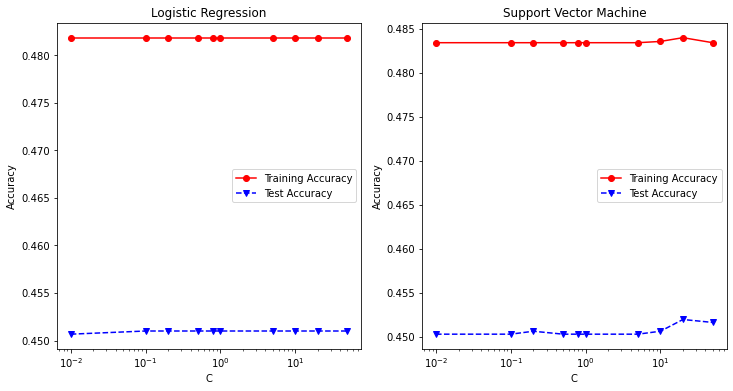

In [5]:
from sklearn import linear_model
from sklearn.svm import SVC

# C (hyperparameter) = Inverse of regularization strength; must be a positive float. 
# Like in support vector machines, smaller values specify stronger regularization.
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtrainAcc = []
LRtestAcc = []
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf3 = linear_model.LogisticRegression(C=param)
    clf3.fit(X_train, Y_train)
    Y_predTrain = clf3.predict(X_train)
    Y_predTest = clf3.predict(X_test)
    LRtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    LRtestAcc.append(accuracy_score(Y_test, Y_predTest))

    # SVC kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
    clf4 = SVC(C=param, kernel='linear') 
    clf4.fit(X_train, Y_train)
    Y_predTrain = clf4.predict(X_train)
    Y_predTest = clf4.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
ax1.legend(['Training Accuracy','Test Accuracy'])
ax1.set_xlabel('C')
ax1.set_xscale('log')
ax1.set_ylabel('Accuracy')
ax1.set_title('Logistic Regression')

ax2.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
ax2.legend(['Training Accuracy','Test Accuracy'])
ax2.set_xlabel('C')
ax2.set_xscale('log')
ax2.set_ylabel('Accuracy')
ax2.set_title('Support Vector Machine')

Observation:Note that linear classifiers perform poorly on the data since the true decision boundaries between 
classes are nonlinear for the given 2-dimensional dataset. Can you visualize?

## Question 4:  Non Linear Support Vector Machine(SVM)

Let's try nonlinear support vector machine with a Gaussian radial basis function (rbf) kernel to fit the 2-dimensional 
dataset.

__Step:__
Repeat the whole process of fitting, prediction and accuracy evaluation by setting SVC kernel to rbf and gamma=aut

**<font color="red">Code:</font>**

Text(0, 0.5, 'Accuracy')

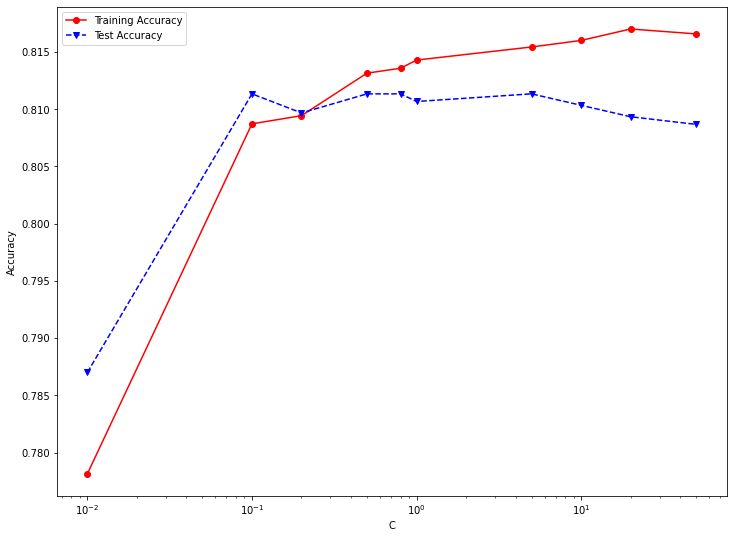

In [6]:
from sklearn.svm import SVC

plt.rcParams["figure.figsize"] = (12,9) # The default value of the figsize parameter is [6.4, 4.8]

# C (hyperparameter) = Inverse of regularization strength; must be a positive float. 
# Like in support vector machines, smaller values specify stronger regularization.
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
    # gamma {‘scale’, ‘auto’} or float, default=’scale’: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
    clf5 = SVC(C=param, kernel='rbf', gamma='auto') 
    clf5.fit(X_train, Y_train)
    Y_predTrain = clf5.predict(X_train)
    Y_predTest = clf5.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

_ = plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

Observation: By using non linear SVM, the accuarcy has improved gradually with higher C (less stringent on regularization)

## Question 5: Visualization of Decision Boundary on various classifiers 

Visualization of decision boundary on the following classifier

1) KNN (K=30)

2) Navie Bayes

3) Logistic Regression (C=50)

4) Linear SVM (C=50)

5) Non Linear SVM (RBF)

6) Decision Tree (Depth =10)

##### Equispaced meshgrid of points

The numpy.meshgrid function is used to create a rectangular grid out of two given one-dimensional arrays representing the Cartesian indexing or Matrix indexing.

[H,V] = meshgrid(h,v) returns 2-D grid coordinates based on the coordinates contained in vectors h and v. H is a matrix where each row is a copy of h, and V is a matrix where each column is a copy of v. The grid represented by the coordinates H and V has length(y) rows and length(x) columns.

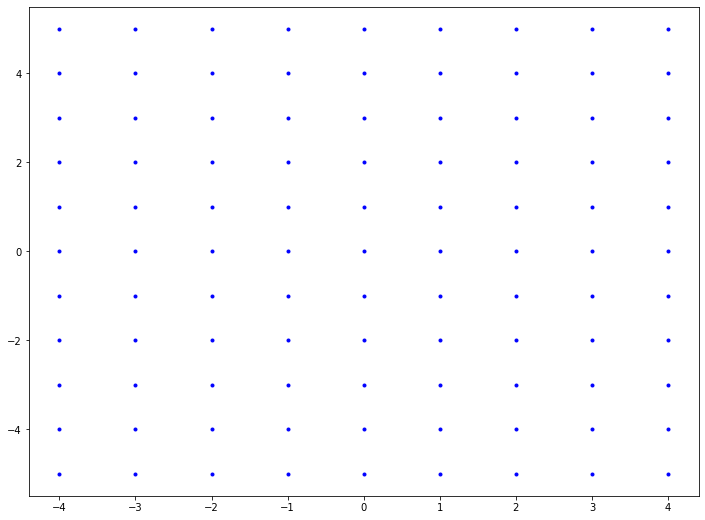

In [7]:
h_coords = np.arange(-4,5,1)
v_coords = np.arange(-5,6,1)
hh, vv = np.meshgrid(h_coords, v_coords)
plt.rcParams["figure.figsize"] = (12,9) # The default value of the figsize parameter is [6.4, 4.8]
_ = plt.plot(hh, vv, marker='.', color='b', linestyle='none')

Consider the above figure with X-axis ranging from -4 to 4 and Y-axis ranging from -5 to 5. 

So there are a total of (9 * 11) = 99 points marked in the figure each with a X-coordinate and a Y-coordinate. 
For any line parallel to the X-axis, the X-coordinates of the marked points respectively are -4, -3, -2, -1, 0, 1, 2, 3, 4. 
For any line parallel to the Y-axis, the Y-coordinates of the marked points from bottom to top are -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5. 
The numpy.meshgrid function returns two 2-Dimensional arrays representing the X and Y coordinates of all the points.

In [8]:
print(hh.shape, '\n', hh, '\n\n', hh.ravel().shape, '\n', hh.ravel())

(11, 9) 
 [[-4 -3 -2 -1  0  1  2  3  4]
 [-4 -3 -2 -1  0  1  2  3  4]
 [-4 -3 -2 -1  0  1  2  3  4]
 [-4 -3 -2 -1  0  1  2  3  4]
 [-4 -3 -2 -1  0  1  2  3  4]
 [-4 -3 -2 -1  0  1  2  3  4]
 [-4 -3 -2 -1  0  1  2  3  4]
 [-4 -3 -2 -1  0  1  2  3  4]
 [-4 -3 -2 -1  0  1  2  3  4]
 [-4 -3 -2 -1  0  1  2  3  4]
 [-4 -3 -2 -1  0  1  2  3  4]] 

 (99,) 
 [-4 -3 -2 -1  0  1  2  3  4 -4 -3 -2 -1  0  1  2  3  4 -4 -3 -2 -1  0  1
  2  3  4 -4 -3 -2 -1  0  1  2  3  4 -4 -3 -2 -1  0  1  2  3  4 -4 -3 -2
 -1  0  1  2  3  4 -4 -3 -2 -1  0  1  2  3  4 -4 -3 -2 -1  0  1  2  3  4
 -4 -3 -2 -1  0  1  2  3  4 -4 -3 -2 -1  0  1  2  3  4 -4 -3 -2 -1  0  1
  2  3  4]


In [9]:
print(vv.shape, '\n', vv, '\n\n', vv.ravel().shape, '\n', vv.ravel())

(11, 9) 
 [[-5 -5 -5 -5 -5 -5 -5 -5 -5]
 [-4 -4 -4 -4 -4 -4 -4 -4 -4]
 [-3 -3 -3 -3 -3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3]
 [ 4  4  4  4  4  4  4  4  4]
 [ 5  5  5  5  5  5  5  5  5]] 

 (99,) 
 [-5 -5 -5 -5 -5 -5 -5 -5 -5 -4 -4 -4 -4 -4 -4 -4 -4 -4 -3 -3 -3 -3 -3 -3
 -3 -3 -3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0
  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5]


##### From X_test, generate equispaced meshgrid of test points

In [10]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(7000, 2) (3000, 2) (7000,) (3000,)


In [11]:
np.set_printoptions(precision=3)

X_test_h_min, X_test_h_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
X_test_v_min, X_test_v_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

X_test_h_tot = ((abs(X_test_h_min) + X_test_h_max) / 0.1) + 1
X_test_v_tot = ((abs(X_test_v_min) + X_test_v_max) / 0.1) + 1

print("X_test_h_min: {0:2.3f}, X_test_h_max: {1:2.3f}, X_test_h_tot: {2:3d}".format(X_test_h_min, X_test_h_max, int(X_test_h_tot)))
print("X_test_v_min: {0:2.3f}, X_test_v_max: {1:2.3f}, X_test_v_tot: {2:3d}".format(X_test_v_min, X_test_v_max, int(X_test_v_tot)))

X_test_h_min: -1.729, X_test_h_max: 20.974, X_test_h_tot: 228
X_test_v_min: -0.980, X_test_v_max: 20.992, X_test_v_tot: 220


**<font color="red">Code:using contourf function to plot the decision boundary</font>**

In [12]:
np.set_printoptions(precision=3)
X_test_h_coords = np.arange(X_test_h_min, X_test_h_max, 0.1)
X_test_v_coords = np.arange(X_test_v_min, X_test_v_max, 0.1)
print(X_test_h_coords, '\n\n', X_test_v_coords)

[-1.729 -1.629 -1.529 -1.429 -1.329 -1.229 -1.129 -1.029 -0.929 -0.829
 -0.729 -0.629 -0.529 -0.429 -0.329 -0.229 -0.129 -0.029  0.071  0.171
  0.271  0.371  0.471  0.571  0.671  0.771  0.871  0.971  1.071  1.171
  1.271  1.371  1.471  1.571  1.671  1.771  1.871  1.971  2.071  2.171
  2.271  2.371  2.471  2.571  2.671  2.771  2.871  2.971  3.071  3.171
  3.271  3.371  3.471  3.571  3.671  3.771  3.871  3.971  4.071  4.171
  4.271  4.371  4.471  4.571  4.671  4.771  4.871  4.971  5.071  5.171
  5.271  5.371  5.471  5.571  5.671  5.771  5.871  5.971  6.071  6.171
  6.271  6.371  6.471  6.571  6.671  6.771  6.871  6.971  7.071  7.171
  7.271  7.371  7.471  7.571  7.671  7.771  7.871  7.971  8.071  8.171
  8.271  8.371  8.471  8.571  8.671  8.771  8.871  8.971  9.071  9.171
  9.271  9.371  9.471  9.571  9.671  9.771  9.871  9.971 10.071 10.171
 10.271 10.371 10.471 10.571 10.671 10.771 10.871 10.971 11.071 11.171
 11.271 11.371 11.471 11.571 11.671 11.771 11.871 11.971 12.071 12.171
 12.27

In [13]:
X_test_HH, X_test_VV = np.meshgrid(X_test_h_coords, X_test_v_coords)

In [14]:
print(X_test_HH.shape, '\n', X_test_HH, '\n\n', X_test_HH.ravel().shape, '\n', X_test_HH.ravel())

(220, 228) 
 [[-1.729 -1.629 -1.529 ... 20.771 20.871 20.971]
 [-1.729 -1.629 -1.529 ... 20.771 20.871 20.971]
 [-1.729 -1.629 -1.529 ... 20.771 20.871 20.971]
 ...
 [-1.729 -1.629 -1.529 ... 20.771 20.871 20.971]
 [-1.729 -1.629 -1.529 ... 20.771 20.871 20.971]
 [-1.729 -1.629 -1.529 ... 20.771 20.871 20.971]] 

 (50160,) 
 [-1.729 -1.629 -1.529 ... 20.771 20.871 20.971]


In [15]:
print(X_test_VV.shape, '\n', X_test_VV, '\n\n', X_test_VV.ravel().shape, '\n', X_test_VV.ravel())

(220, 228) 
 [[-0.98 -0.98 -0.98 ... -0.98 -0.98 -0.98]
 [-0.88 -0.88 -0.88 ... -0.88 -0.88 -0.88]
 [-0.78 -0.78 -0.78 ... -0.78 -0.78 -0.78]
 ...
 [20.72 20.72 20.72 ... 20.72 20.72 20.72]
 [20.82 20.82 20.82 ... 20.82 20.82 20.82]
 [20.92 20.92 20.92 ... 20.92 20.92 20.92]] 

 (50160,) 
 [-0.98 -0.98 -0.98 ... 20.92 20.92 20.92]


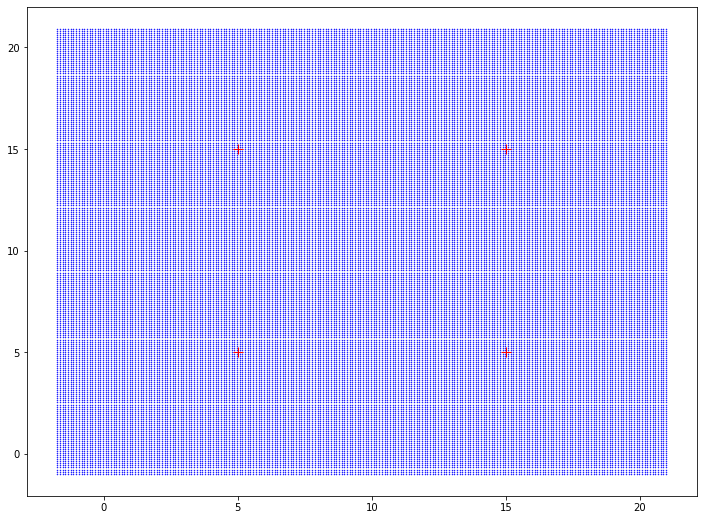

In [16]:
plt.rcParams["figure.figsize"] = (12,9) # The default value of the figsize parameter is [6.4, 4.8]
plt.plot(X_test_HH.ravel(), X_test_VV.ravel(), 'b.', ms=1)
plt.plot(5, 15, 'r+', 15, 15, 'r+', 15, 5, 'r+', 5, 5, 'r+', ms=10)

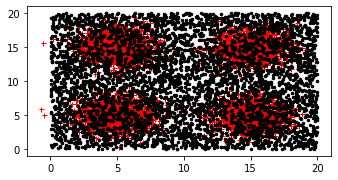

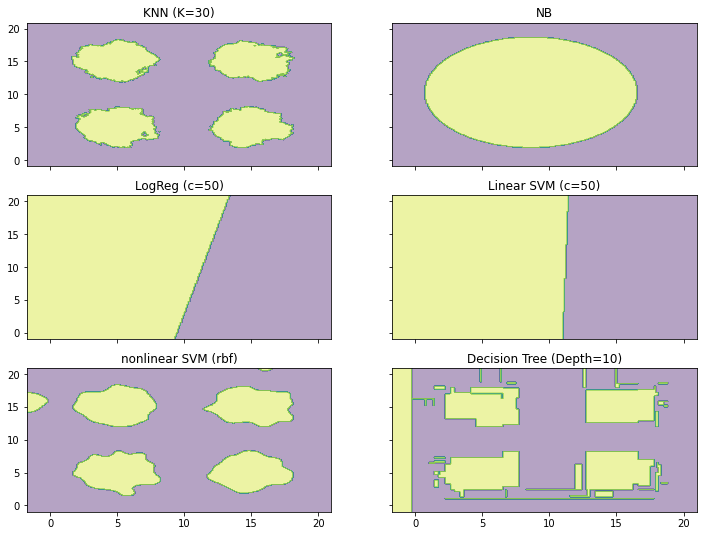

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf6=DecisionTreeClassifier(max_depth=10)
clf6.fit(X_train, Y_train)

plt.rcParams["figure.figsize"] = (5.45, 2.75) # The default value of the figsize parameter is [6.4, 4.8]
plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=5)

f, axarr = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(12, 9))

for idx, clf, tt in zip([[0, 0],[0,1],[1,0],[1,1],[2,0],[2,1]], 
                        [clf1,clf2,clf3,clf4,clf5,clf6],
                        ['KNN (K=30)','NB', 'LogReg (c=50)','Linear SVM (c=50)','nonlinear SVM (rbf)','Decision Tree (Depth=10)']):
    # ravel(): return a contiguous flattened array
    # np.c_[,]: Translates slice objects to concatenation along the second axis.
    Z = clf.predict(np.c_[X_test_HH.ravel(), X_test_VV.ravel()]) 
    Z = Z.reshape(X_test_HH.shape)
    axarr[idx[0], idx[1]].contourf(X_test_HH, X_test_VV, Z, alpha=0.4) # Draw filled contours
    axarr[idx[0], idx[1]].set_title(tt)
_ = plt.show()

Observation: As shown, KNN, Non linear SVM and Decision Tree can follow the contour of class and separate out the 
two binary class well

In [ ]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]